In [57]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import time as t
import sklearn.utils as u
import sklearn.preprocessing as pp
import sklearn.tree as tr
import sklearn.ensemble as es
import sklearn.metrics as m
import sklearn.linear_model as lm
import sklearn.neural_network as nn
import numpy as np
import random as rnd
import warnings as w
w.filterwarnings('ignore')

In [58]:
#data reading csv file to analyze data.
data = pd.read_csv(r'C:\Users\DAO-Skd\Downloads\Deep learning lab\project\by nust\AI-Data.csv')
data


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [59]:
#prints information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

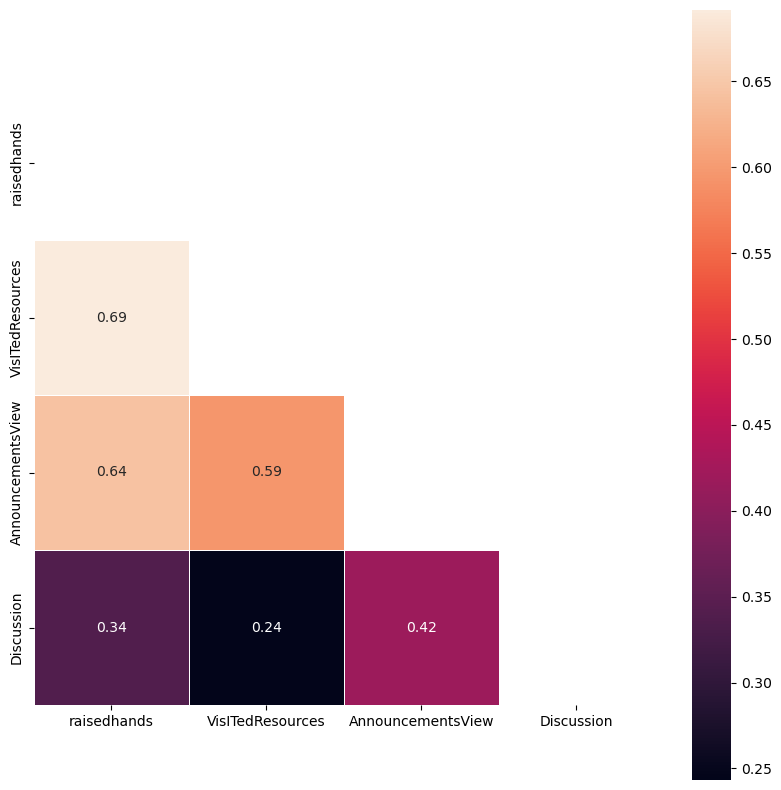

In [60]:
#using a heatmap to show correlation
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
sns.heatmap(data.corr(), linewidths=0.5, mask=mask, square=True, ax=ax, annot=True);

In [61]:
#checking missing values and is availabel the sum of missing values will showdata.isnull().sum()
data.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [62]:
#only name of catogragal columns
#A categorical variable takes on a limited, and usually fixed, number of possible values 
catagorical_cols=data.select_dtypes(include='object').columns
catagorical_cols


Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey',
       'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class'],
      dtype='object')

In [63]:
# displaying type of unique features in each catogorical columns
for i in catagorical_cols:
    print(data[i].unique())
   

['M' 'F']
['KW' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Palestine' 'Iraq' 'Lybia']
['KuwaIT' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Iraq' 'Palestine' 'Lybia']
['lowerlevel' 'MiddleSchool' 'HighSchool']
['G-04' 'G-07' 'G-08' 'G-06' 'G-05' 'G-09' 'G-12' 'G-11' 'G-10' 'G-02']
['A' 'B' 'C']
['IT' 'Math' 'Arabic' 'Science' 'English' 'Quran' 'Spanish' 'French'
 'History' 'Biology' 'Chemistry' 'Geology']
['F' 'S']
['Father' 'Mum']
['Yes' 'No']
['Good' 'Bad']
['Under-7' 'Above-7']
['M' 'L' 'H']


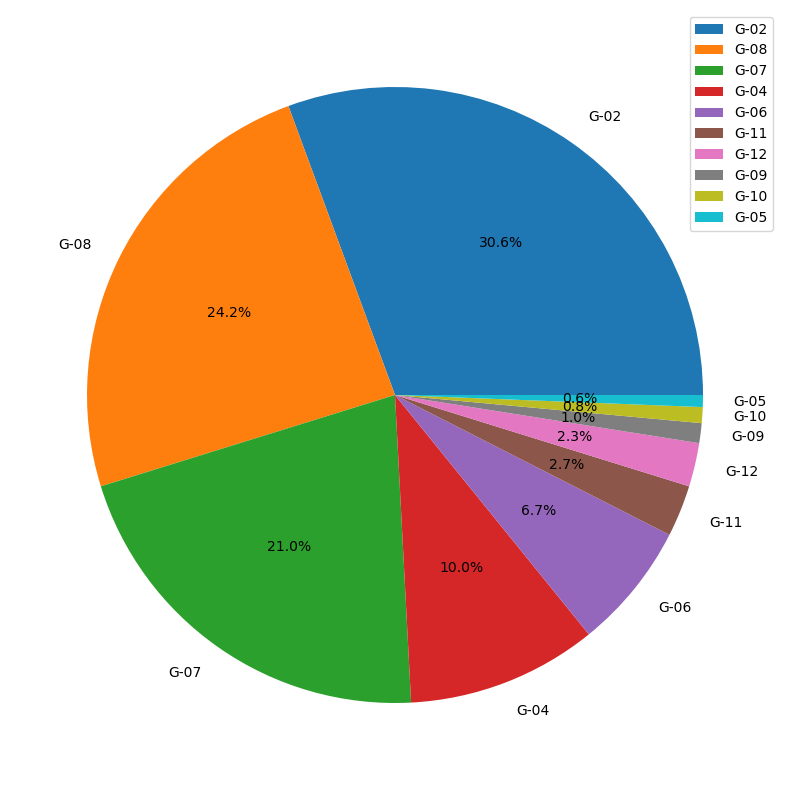

In [64]:
#student performance in subject of gender through pie chart
count_test = data['GradeID'].value_counts()
labels = data['GradeID'].value_counts().index
plt.figure(figsize= (10,10))
plt.pie(count_test,labels=labels,autopct='%2.1f%%')
plt.legend(labels,loc='upper right')
plt.show()

In [65]:
#returns a specified number of rows, string from the top by default 5 rows
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [66]:
#sisplaying brief pictuer/details of the dataset
data.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [67]:
data.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [68]:
#showing rows and columns
print(data.shape)


(480, 17)


In [69]:
#Python returns the number of missing values (NaN) in each column 
#of a DataFrame or a tabular data structure.
data.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

## data visulaliation of each columns using loop


    1.Marks Class total students Graph.
    2.Marks Class Semester-wise Graph
    3.Marks Class Gender-wise Graph
    4.Marks Class Nationality-wise Graph
    5.Marks Class Grade-wise Graph
    6.Marks Class Section-wise Graph
    7.Marks Class Topic-wise Graph
    8.Marks Class Stage-wise Graph
    9.Marks Class Absent Days-wise
    10.Marks Class PlaceofBirth wise Graph
    11.Marks Class ParentAnsweringSurvey wise Graph
    12.For Exit Data Visuilation 
    
Enter Choice: 11
Loading Graph..

	Marks Class ParentansweringSurvey-wise Graph


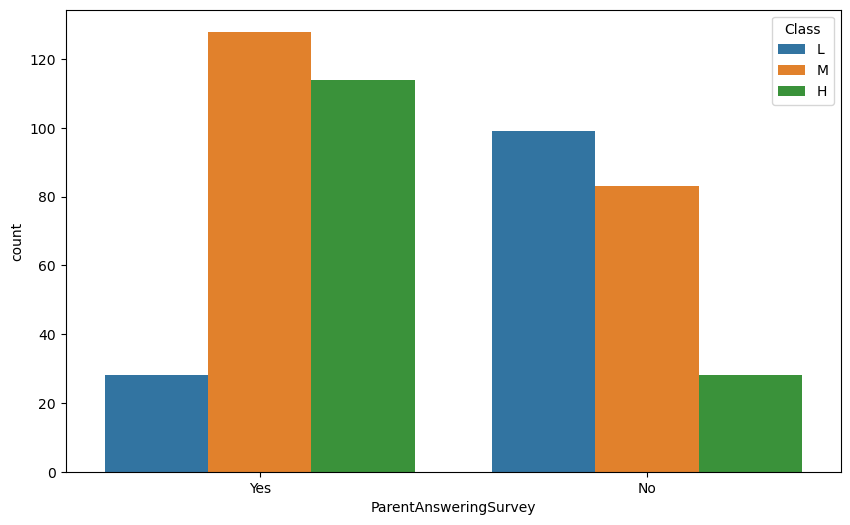


    1.Marks Class total students Graph.
    2.Marks Class Semester-wise Graph
    3.Marks Class Gender-wise Graph
    4.Marks Class Nationality-wise Graph
    5.Marks Class Grade-wise Graph
    6.Marks Class Section-wise Graph
    7.Marks Class Topic-wise Graph
    8.Marks Class Stage-wise Graph
    9.Marks Class Absent Days-wise
    10.Marks Class PlaceofBirth wise Graph
    11.Marks Class ParentAnsweringSurvey wise Graph
    12.For Exit Data Visuilation 
    
Enter Choice: 12
Exiting..


Accuracy measures using Decision Tree:
              precision    recall  f1-score   support

           0       0.59      0.65      0.62        52
           1       0.88      0.82      0.85        28
           2       0.61      0.57      0.59        63

    accuracy                           0.65       143
   macro avg       0.69      0.68      0.69       143
weighted avg       0.66      0.65      0.65       143
 


Accuracy using Decision Tree:  0.65

Accuracy Measures for Random Forest Classifi

KeyboardInterrupt: Interrupted by user

In [70]:
option = 0
while(option != 12):
    print("""
    1.Marks Class total students Graph.
    2.Marks Class Semester-wise Graph
    3.Marks Class Gender-wise Graph
    4.Marks Class Nationality-wise Graph
    5.Marks Class Grade-wise Graph
    6.Marks Class Section-wise Graph
    7.Marks Class Topic-wise Graph
    8.Marks Class Stage-wise Graph
    9.Marks Class Absent Days-wise
    10.Marks Class PlaceofBirth wise Graph
    11.Marks Class ParentAnsweringSurvey wise Graph
    12.For Exit Data Visuilation 
    """)
    option = int(input("Enter Choice: "))
    if (option == 1):
        print("Loading Graph....\n")
        t.sleep(1)
        print("\tMarks Class Count Graph")
        axes = sb.countplot(x='Class', data=data, order=['L', 'M', 'H'])
        plt.show()
    elif (option == 2):
        print("Loading Graph....\n")
        t.sleep(1)
        print("\tMarks Class Semester-wise Graph")
        fig, axesarr = plt.subplots(1, figsize=(10, 6))
        sb.countplot(x='Semester', hue='Class', data=data, hue_order=['L', 'M', 'H'], axes=axesarr)
        plt.show()
    elif (option == 3):
        print("Loading Graph..\n")
        t.sleep(1)
        print("\tMarks Class Gender-wise Graph")
        fig, axesarr = plt.subplots(1, figsize=(10, 6))
        sb.countplot(x='gender', hue='Class', data=data, order=['M', 'F'], hue_order=['L', 'M', 'H'], axes=axesarr)
        plt.show()
    elif (option == 4):
        print("Loading Graph..\n")
        t.sleep(1)
        print("\tMarks Class Nationality-wise Graph")
        fig, axesarr = plt.subplots(1, figsize=(10, 6))
        sb.countplot(x='NationalITy', hue='Class', data=data, hue_order=['L', 'M', 'H'], axes=axesarr)
        plt.show()
    elif (option == 5):
        print("Loading Graph: \n")
        t.sleep(1)
        print("\tMarks Class Grade-wise Graph")
        fig, axesarr = plt.subplots(1, figsize=(10, 6))
        sb.countplot(x='GradeID', hue='Class', data=data, order=['G-02', 'G-04', 'G-05', 'G-06', 'G-07', 'G-08', 'G-09', 'G-10', 'G-11', 'G-12'], hue_order = ['L', 'M', 'H'], axes=axesarr)
        plt.show()
    elif (option ==6):
        print("Loading Graph..\n")
        t.sleep(1)
        print("\tMarks Class Section-wise Graph")
        fig, axesarr = plt.subplots(1, figsize=(10, 6))
        sb.countplot(x='SectionID', hue='Class', data=data, hue_order = ['L', 'M', 'H'], axes=axesarr)
        plt.show()
    elif (option == 7):
        print("Loading Graph..\n")
        t.sleep(1)
        print("\tMarks Class Topic-wise Graph")
        fig, axesarr = plt.subplots(1, figsize=(10, 6))
        sb.countplot(x='Topic', hue='Class', data=data, hue_order = ['L', 'M', 'H'], axes=axesarr)
        plt.show()
    elif (option == 8):
        print("Loading Graph..\n")
        t.sleep(1)
        print("\tMarks Class Stage-wise Graph")
        fig, axesarr = plt.subplots(1, figsize=(10, 6))
        sb.countplot(x='StageID', hue='Class', data=data, hue_order = ['L', 'M', 'H'], axes=axesarr)
        plt.show()
    elif (option == 9):
        print("Loading Graph..\n")
        t.sleep(1)
        print("\tMarks Class Absent Days-wise Graph")
        fig, axesarr = plt.subplots(1, figsize=(10, 6))
        sb.countplot(x='StudentAbsenceDays', hue='Class', data=data, hue_order = ['L', 'M', 'H'], axes=axesarr)
        plt.show()
    elif (option == 10):
        print("Loading Graph..\n")
        t.sleep(1)
        print("\tMarks Class Place of Birth wise Graph")
        fig, axesarr = plt.subplots(1, figsize=(10, 6))
        sb.countplot(x='PlaceofBirth', hue='Class', data=data, hue_order = ['L', 'M', 'H'], axes=axesarr)
        plt.show()
    elif (option == 11):
        print("Loading Graph..\n")
        t.sleep(1)
        print("\tMarks Class ParentansweringSurvey-wise Graph")
        fig, axesarr = plt.subplots(1, figsize=(10, 6))
        sb.countplot(x='ParentAnsweringSurvey', hue='Class', data=data, hue_order = ['L', 'M', 'H'], axes=axesarr)
        plt.show()
if(option == 12):
    print("Exiting..\n")
    t.sleep(1)
#cor = data.corr()
#print(cor)
data = data.drop("gender", axis=1)
data = data.drop("StageID", axis=1)
data = data.drop("GradeID", axis=1)
data = data.drop("NationalITy", axis=1)
data = data.drop("PlaceofBirth", axis=1)
data = data.drop("SectionID", axis=1)
data = data.drop("Topic", axis=1)
data = data.drop("Semester", axis=1)
data = data.drop("Relation", axis=1)
data = data.drop("ParentschoolSatisfaction", axis=1)
data = data.drop("ParentAnsweringSurvey", axis=1)
#data = data.drop("VisITedResources", axis=1)
data = data.drop("AnnouncementsView", axis=1)
u.shuffle(data)
countD = 0
countP = 0
countL = 0
countR = 0
countN = 0
gradeID_dict = {"G-01" : 1,
                "G-02" : 2,
                "G-03" : 3,
                "G-04" : 4,
                "G-05" : 5,
                "G-06" : 6,
                "G-07" : 7,
                "G-08" : 8,
                "G-09" : 9,
                "G-10" : 10,
                "G-11" : 11,
                "G-12" : 12}
data = data.replace({"GradeID" : gradeID_dict})
#sig = []
for column in data.columns:
    if data[column].dtype == type(object):
        le = pp.LabelEncoder()
        data[column] = le.fit_transform(data[column])
ind = int(len(data) * 0.70)
feats = data.values[:, 0:4]
lbls = data.values[:,4]
feats_Train = feats[0:ind]
feats_Test = feats[(ind+1):len(feats)]
lbls_Train = lbls[0:ind]
lbls_Test = lbls[(ind+1):len(lbls)]
modelD = tr.DecisionTreeClassifier()
modelD.fit(feats_Train, lbls_Train)
lbls_predD = modelD.predict(feats_Test)
for a,b in zip(lbls_Test, lbls_predD):
    if(a==b):
        countD += 1
accD = (countD/len(lbls_Test))
print("\nAccuracy measures using Decision Tree:")
print(m.classification_report(lbls_Test, lbls_predD),"\n")
print("\nAccuracy using Decision Tree: ", str(round(accD, 3)))
t.sleep(1)
modelR = es.RandomForestClassifier()
modelR.fit(feats_Train, lbls_Train)
lbls_predR = modelR.predict(feats_Test)
for a,b in zip(lbls_Test, lbls_predR):
    if(a==b):
        countR += 1
print("\nAccuracy Measures for Random Forest Classifier: \n")
#print("\nConfusion Matrix: \n", m.confusion_matrix(lbls_Test, lbls_predR))
print("\n", m.classification_report(lbls_Test,lbls_predR))
accR = countR/len(lbls_Test)
print("\nAccuracy using Random Forest: ", str(round(accR, 3)))
t.sleep(1)
modelP = lm.Perceptron()
modelP.fit(feats_Train, lbls_Train)
lbls_predP = modelP.predict(feats_Test)
for a,b in zip(lbls_Test, lbls_predP):
    if a == b:
        countP += 1
accP = countP/len(lbls_Test)
print("\nAccuracy measures using Linear Model Perceptron:")
print(m.classification_report(lbls_Test, lbls_predP),"\n") 
print("\nAccuracy using Linear Model Perceptron: ", str(round(accP, 3)), "\n")
t.sleep(1)
modelL = lm.LogisticRegression()
modelL.fit(feats_Train, lbls_Train)
lbls_predL = modelL.predict(feats_Test)
for a,b in zip(lbls_Test, lbls_predL):
    if a == b:
        countL += 1
accL = countL/len(lbls_Test)
print("\nAccuracy measures using Linear Model Logistic Regression:")
print(m.classification_report(lbls_Test, lbls_predL),"\n")
print("\nAccuracy using Linear Model Logistic Regression: ", str(round(accP, 3)), "\n")
t.sleep(1)
modelN = nn.MLPClassifier(activation="logistic")
modelN.fit(feats_Train, lbls_Train)
lbls_predN = modelN.predict(feats_Test)
for a,b in zip(lbls_Test, lbls_predN):
    #sig.append(1/(1+ np.exp(-b)))
    if a==b:
        countN += 1
#print("\nAverage value of Sigmoid Function: ", str(round(np.average(sig), 3)))
print("\nAccuracy measures using MLP Classifier:")
print(m.classification_report(lbls_Test, lbls_predN),"\n")
accN = countN/len(lbls_Test)
print("\nAccuracy using Neural Network MLP Classifier: ", str(round(accN, 3)), "\n")
choice = input("Do you want to test specific input (y or n): ")
if(choice.lower()=="y"):
    gen = input("Enter Gender (M or F): ")
    if (gen.upper() == "M"):
       gen = 1
    elif (gen.upper() == "F"):
       gen = 0
    nat = input("Enter Nationality: ")
    pob = input("Place of Birth: ")
    gra = input("Grade ID as (G-<grade>): ")
    if(gra == "G-02"):
        gra = 2
    elif (gra == "G-04"):
        gra = 4
    elif (gra == "G-05"):
        gra = 5
    elif (gra == "G-06"):
        gra = 6
    elif (gra == "G-07"):
        gra = 7
    elif (gra == "G-08"):
        gra = 8
    elif (gra == "G-09"):
        gra = 9
    elif (gra == "G-10"):
        gra = 10
    elif (gra == "G-11"):
        gra = 11
    elif (gra == "G-12"):
        gra = 12
    sec = input("Enter Section: ")
    top = input("Enter Topic: ")
    sem = input("Enter Semester (F or S): ")
    if (sem.upper() == "F"):
       sem = 0
    elif (sem.upper() == "S"):
       sem = 1
    rel = input("Enter Relation (Father or Mum): ")
    if (rel == "Father"):
       rel = 0
    elif (rel == "Mum"):
       rel = 1
    rai = int(input("Enter raised hands: "))
    res = int(input("Enter Visited Resources: "))
    ann = int(input("Enter announcements viewed: "))
    dis = int(input("Enter no. of Discussions: "))
    sur = input("Enter Parent Answered Survey (Y or N): ")
    if (sur.upper() == "Y"):
       sur = 1
    elif (sur.upper() == "N"):
       sur = 0
    sat = input("Enter Parent School Satisfaction (Good or Bad): ")
    if (sat == "Good"):
       sat = 1
    elif (sat == "Bad"):
       sat = 0
    absc = input("Enter No. of Abscenes(Under-7 or Above-7): ")
    if (absc == "Under-7"):
       absc = 1
    elif (absc == "Above-7"):
       absc = 0
    arr = np.array([rai, res, dis, absc])
    #arr = np.array([gen, rnd.randint(0, 30), rnd.randint(0, 30), sta, gra, rnd.randint(0, 30), rnd.randint(0, 30), sem, rel, rai, res, ann, dis, sur, sat, absc])
    predD = modelD.predict(arr.reshape(1, -1))
    predR = modelR.predict(arr.reshape(1, -1))
    predP = modelP.predict(arr.reshape(1, -1))
    predL = modelL.predict(arr.reshape(1, -1))
    predN = modelN.predict(arr.reshape(1, -1))
    if (predD == 0):
        predD = "H"
    elif (predD == 1):
        predD = "M"
    elif (predD == 2):
        predD = "L"
    if (predR == 0):
        predR = "H"
    elif (predR == 1):
        predR = "M"
    elif (predR == 2):
        predR = "L"
    if (predP == 0):
        predP = "H"
    elif (predP == 1):
        predP = "M"
    elif (predP == 2):
        predP = "L"
    if (predL == 0):
        predL = "H"
    elif (predL == 1):
        predL = "M"
    elif (predL == 2):
        predL = "L"
    if (predN == 0):
        predN = "H"
    elif (predN == 1):
        predN = "M"
    elif (predN == 2):
        predN = "L"
    t.sleep(1)
    print("\nUsing Decision Tree Classifier: ", predD)
    t.sleep(1)
    print("Using Random Forest Classifier: ", predR)
    t.sleep(1)
    print("Using Linear Model Perceptron: ", predP)
    t.sleep(1)
    print("Using Linear Model Logisitic Regression: ", predL)
    t.sleep(1)
    print("Using Neural Network MLP Classifier: ", predN)
    print("\nExiting...")
    t.sleep(1)
else:
    print("Exiting..")
    t.sleep(1)